#### PAIR PROGRAMMING - EDA 3

Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librería matplotlib y seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable



In [2]:
df = pd.read_csv("../datos/historico_tickets_limpio_pandas.csv", index_col = 0)

#### OBJETIVOS

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

NOTA: Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [3]:
# establecer el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:
   
   - En la primera gráfica tendremos que contestar la siguiente pregunta: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?. Para eso tendréis que:
     - Crear un subplot con dos gráficas.


     - En la primera gráfica tendréis que mostrar la relación que existe entre la severidad y el tiempo de resolución. ¿Son los tickets que tienen una severidad más alta los que más tardan en resolverse?
     - En la segunda gráfica tendréis que mostrar la relación que existe entre la prioridad y el tiempo de resolución. ¿Son los tickets que tienen una prioridad más alta los que más tardan en resolverse?


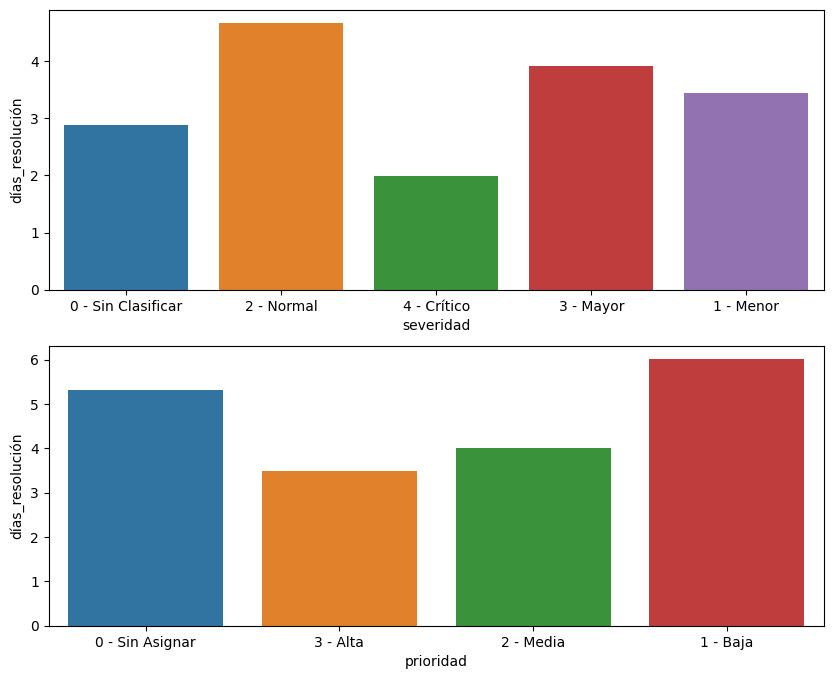

In [4]:
fig, axes= plt.subplots (2,1)

sns.barplot(data = df, x = "severidad", y = "días_resolución", ax = axes[0], errorbar=('ci', False))
sns.barplot(data = df, x = "prioridad", y = "días_resolución", ax = axes[1], errorbar=('ci', False))

plt.show();


In [5]:
df.dtypes

id_ticket          object
fecha              object
id_empleado         int64
id_agente           int64
categoría          object
tipo               object
severidad          object
prioridad          object
días_resolución     int64
satisfacción        int64
semestre           object
año                 int64
mes                object
dtype: object

In [6]:
df.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
2,GDDESR-1342539995,2016-06-18,569,29,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3,5,1 semestre,2016,Junio
3,GDDTSR-5942488006,2016-04-28,320,40,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9,5,1 semestre,2016,Abril
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio


In [7]:
df["severidad"].unique()

array(['0 - Sin Clasificar', '2 - Normal', '4 - Crítico', '3 - Mayor',
       '1 - Menor'], dtype=object)

  
   - En la segunda gráfica contestaremos a la siguiente pregunta: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?. Para eso tendréis que:
     - Crear otro dataframe donde tengáis solo los datos para los datos para los problemas de tipo "Acceso/Login" o "Software".
     - Crear una gráfica donde podamos ver la satisfacción de los clientes en función de los problemas filtrados en el paso anterior.


In [11]:
df_acc_soft = df[(df["categoría"] == "Acceso/Login" ) | ( df["categoría"] == "Software" )] 

In [12]:
df_acc_soft.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio
5,GDLEER-0142608095,2016-08-26,59,20,Software,Problema,2 - Normal,0 - Sin Asignar,1,1,2º semestre,2016,Agosto
6,GDLEER-0242564650,2016-07-13,1175,36,Software,Problema,2 - Normal,0 - Sin Asignar,2,1,2º semestre,2016,Julio


In [13]:
df_acc_soft["categoría"].unique()

array(['Acceso/Login', 'Software'], dtype=object)

<AxesSubplot:xlabel='satisfacción', ylabel='categoría'>

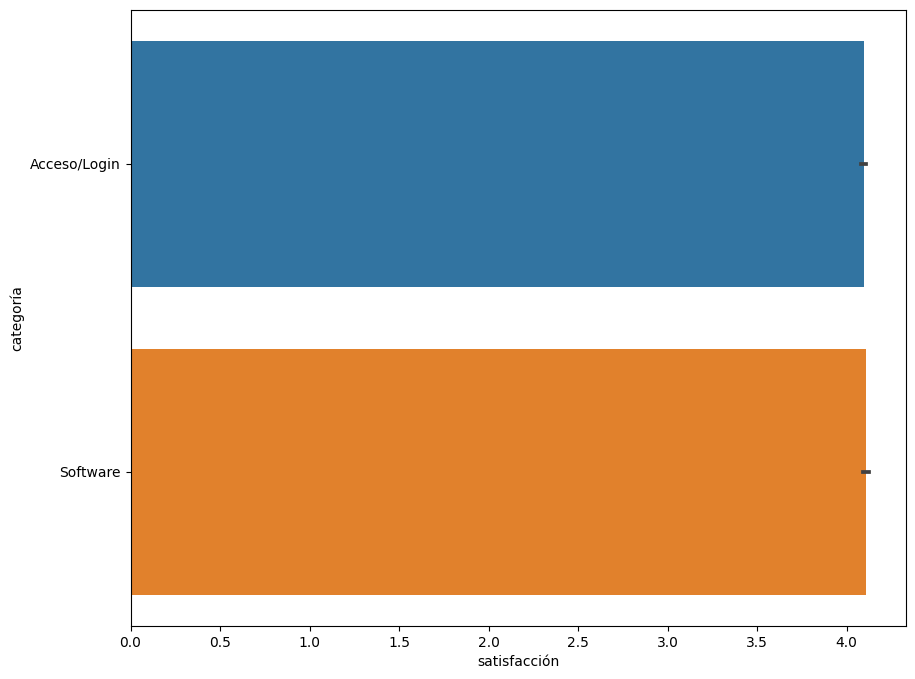

In [15]:
sns.barplot(data= df_acc_soft, x = "satisfacción", y = "categoría")


   - En la tercera gráfica contestaremos a las siguientes preguntas ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?. Para contestar a esto haremos 3 gráficas independientes:
  
     - En la primera gráfica deberemos, ¿Cuáles son los empleados que más tickets atienden?:
  
       - Sacar el número de tickets por empleado. Pista 💡 Para esto tendremos que usar un groupby.
       - Visualizar el resultado del groupby anterior con la gráfica que sea más adecuada.

     - En la segunda gráfica, ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes?
  
       - Deberéis crear una lista donde tengamos los "id's" de los 10 empleados que resuelvan más cantidad tickets y con los 10 empleados que resuelvan menos cantidad de tickets.
       - Usando la lista generada en el ejercicio anterior filtrad el dataframe para quedaros solo con los 10 seleccionados en el ejercicio anterior.
       - Una vez tengáis el dataframe filtrado, cread una gráfica donde veamos el tiempo de resolución de solicitudes para cada empleado

     - En la tercera gráfica, ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?:
  
       - 📌 Usaremos los mismos datos que en la pregunta anterior, el dataframe de los 10 empleados más productivos y menos productivos.
       - Cread una gráfica donde veamos la satisfacción de los clientes para cada empleado.

In [22]:
df.groupby("id_empleado")["id_ticket"].value_counts()

id_empleado  id_ticket        
1            GDLESR-5143625114    1
             GDLTER-1142800813    1
             GDLTER-2243828417    1
             GDLTNR-9042714516    1
             GDLTSR-7043042816    1
                                 ..
2000         TMLTER-4043774902    1
             TMRESR-0342674305    1
             TWLTER-1343153201    1
             TWLTSR-8443731308    1
             TWLTSR-9243502703    1
Name: id_ticket, Length: 97386, dtype: int64

In [16]:
df.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
2,GDDESR-1342539995,2016-06-18,569,29,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3,5,1 semestre,2016,Junio
3,GDDTSR-5942488006,2016-04-28,320,40,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9,5,1 semestre,2016,Abril
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio


Podríamos hacer más gráficas para seguir explorando nuestras hipótesis, pero tenemos el tiempo limitado 😢. Aún así, sentiros libres de explorar todo lo que queráis vuestros datos para entenderlos mejor 😉.